# eda

trying to see what models might be good

In [2]:
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
sunset = Image.open('./data/training/sunset_1.jpg')
sampled_image = np.array(sunset.resize((100, 75))).reshape((7500, 3))

In [4]:
sampled_image.shape

(7500, 3)

In [6]:
df = pd.DataFrame(sampled_image)
df.columns = ['R', 'G', 'B']

### histograms

looking for color distributions. have gaussian mixtures on the brain

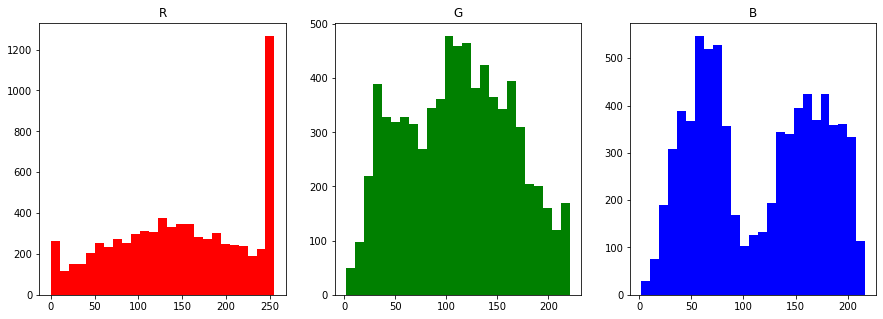

In [29]:
fig = plt.figure(figsize=(15, 5))
axs = {
    'R': fig.add_subplot(131),
    'G': fig.add_subplot(132),
    'B': fig.add_subplot(133)
}

for color in axs:
    axs[color].hist(df[color], bins=25, color=color.lower())
    axs[color].set_title(color)
plt.show()

### pca
because it would be nice to to able to visualize the color-spread

In [257]:
from sklearn.decomposition import PCA

In [303]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(sampled_image)

In [304]:
X_pca_0 = X_pca[:, 0]
X_pca_1 = X_pca[:, 1]

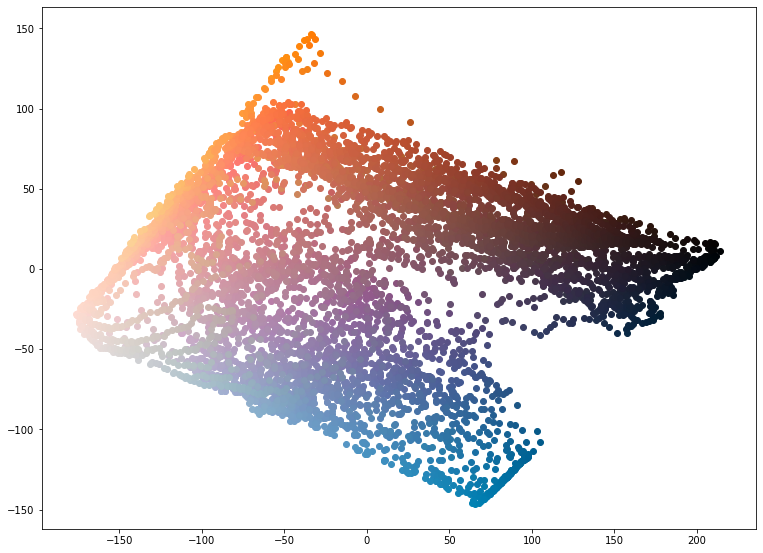

In [314]:
fig = plt.figure(figsize=(12.8, 9.6))
ax = fig.add_subplot(111)

for i in range(len(sampled_image)):
    ax.scatter(X_pca_0[i], X_pca_1[i], c=sampled_image[[i]]/255)
plt.show()